In [2]:
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
data = keras.datasets.mnist.load_data()
train_X, test_X, train_y, test_y = train_test_split(data[0][0], data[0][1], test_size=0.2)

In [4]:
train_X.shape

(48000, 28, 28)

In [5]:
test_X.shape

(12000, 28, 28)

In [6]:
train_y

array([4, 1, 3, ..., 2, 1, 3], dtype=uint8)

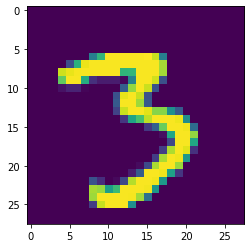

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_X[2])

In [8]:
train_X = train_X/255
test_X = test_X/255

In [9]:
train_X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
hist = model.fit(train_X,train_y,epochs=25,validation_split=0.2)

Epoch 1/25
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3161 - accuracy: 0.9086 - val_loss: 0.1879 - val_accuracy: 0.9432
Epoch 2/25
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1330 - accuracy: 0.9598 - val_loss: 0.1210 - val_accuracy: 0.9641
Epoch 3/25
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0907 - accuracy: 0.9716 - val_loss: 0.1129 - val_accuracy: 0.9669
Epoch 4/25
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.1077 - val_accuracy: 0.9697
Epoch 5/25
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0529 - accuracy: 0.9827 - val_loss: 0.1124 - val_accuracy: 0.9689
Epoch 6/25
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0409 - accuracy: 0.9865 - val_loss: 0.1072 - val_accuracy: 0.9703
Epoch 7/25
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.1169 - val_accuracy:

In [14]:
prob_y = model.predict(test_X)

375/375 [==============================] - 1s 1ms/step


In [15]:
pred_y = prob_y.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,pred_y)

0.9701666666666666

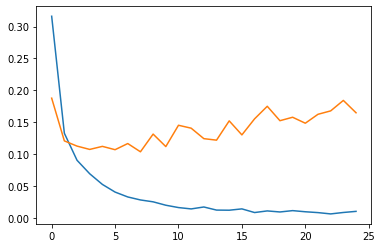

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

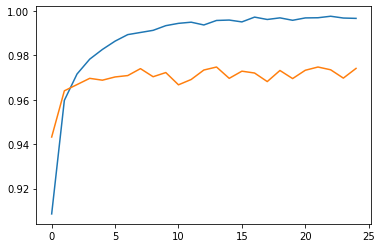

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

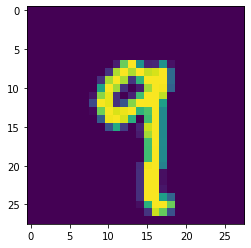

In [19]:
plt.imshow(test_X[1])

In [20]:
model.predict(test_X[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 59ms/step


array([9], dtype=int64)